In [1]:
import glob
import numpy as np
import pandas as pd
import re

pattern = re.compile(r'(\d{4}\-\d{2})\-([-a-z]*)\-street\.csv$')
dataFiles = glob.glob('./**/*.csv', recursive=True)
dates, forces = set(), set()
dataColumns =  {}

In [2]:
# Function to calculate month offset

def month_Offset(start, target):
    startYear, startMonth   = [int(x) for x in start.split('-')]
    targetYear, targetMonth = [int(x) for x in target.split('-')]
    
    return (targetYear - startYear) * 12 + targetMonth - startMonth

In [3]:
def incrementDateByMonth(yearMonthStr):
    year, month = [int(x) for x in yearMonthStr.split('-')]
    
    if year < 1000:
        raise ValueError('Year out of bounds')
    month += 1
    if month > 12:
        month = 1
        year += 1
    return f'{year}-{month}'
        

In [4]:
# prepare to accept data
for name in dataFiles:
    results = re.findall(pattern, name)
    date, force = results[0][0], results[0][1]
    dates.add(date)
    forces.add(force)

startDate = min(dates)
forces = sorted(forces)

for force in forces:
    dataColumns[force] = [np.NaN] * len(dates)

In [6]:
# load in data from all of the files

for file in dataFiles:
    df = pd.read_csv(file, usecols=['Crime type'])
    
    results = re.findall(pattern, file)
    date, force = results[0][0], results[0][1]
    bikeThefts = df.groupby(['Crime type']).size()['Bicycle theft']

    dataColumns[force][month_Offset(startDate, date)] = bikeThefts

Using the 'usecols' option in read_csv cut down processing time of csv files by half, it would be good to use Dask to parallelise the processing.

In [7]:
# Create DataFrame

bikeTheftsFrame = pd.DataFrame.from_dict(dataColumns)
endDate = incrementDateByMonth(max(dates))
bikeTheftsFrame.index = pd.date_range(startDate, endDate, freq='M')

In [8]:
bikeTheftsFrame

,avon-and-somerset,bedfordshire,btp,cambridgeshire,cheshire,city-of-london,cleveland,cumbria,derbyshire,devon-and-cornwall,...,staffordshire,suffolk,surrey,sussex,thames-valley,warwickshire,west-mercia,west-midlands,west-yorkshire,wiltshire
2015-12-31,169,57,289.0,253,84,20,60,22,51,61,...,60,58,48,117,344,45,76,248,155,30
2016-01-31,191,74,264.0,335,79,15,72,16,45,40,...,59,64,71,88,272,42,64,185,123,54
2016-02-29,185,52,NaN,203,65,14,78,14,42,39,...,43,64,62,135,260,35,79,218,133,37
2016-03-31,254,65,NaN,222,72,16,66,24,54,66,...,52,61,71,143,293,44,78,186,129,47
2016-04-30,230,63,304.0,227,61,34,71,21,48,53,...,61,98,66,159,347,51,76,277,198,53
2016-05-31,261,77,406.0,317,103,26,62,24,80,80,...,95,97,86,167,419,51,89,301,198,71
2016-06-30,262,80,461.0,289,124,38,77,37,62,70,...,80,115,76,215,482,54,68,297,250,62
2016-07-31,305,88,516.0,354,108,35,102,35,62,92,...,70,93,126,274,490,73,81,302,254,62
2016-08-31,291,87,586.0,402,123,52,84,44,109,87,...,88,88,120,237,519,84,100,346,289,69
2016-09-30,311,96,44.0,363,138,45,108,26,100,80,...,111,116,124,259,589,78,124,294,313,71


The dataframe of the bike theft data for each force for each month, this allows any issues to be found before totalling up the values.

In [9]:
bikeTheftsFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2015-12-31 to 2018-11-30
Freq: M
Data columns (total 45 columns):
avon-and-somerset     36 non-null int64
bedfordshire          36 non-null int64
btp                   34 non-null float64
cambridgeshire        36 non-null int64
cheshire              36 non-null int64
city-of-london        36 non-null int64
cleveland             36 non-null int64
cumbria               36 non-null int64
derbyshire            36 non-null int64
devon-and-cornwall    36 non-null int64
dorset                36 non-null int64
durham                36 non-null int64
dyfed-powys           36 non-null int64
essex                 36 non-null int64
gloucestershire       36 non-null int64
greater-manchester    36 non-null int64
gwent                 36 non-null int64
hampshire             36 non-null int64
hertfordshire         36 non-null int64
humberside            35 non-null float64
kent                  35 non-null float64
lancashire            3

/Users/zeristor/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


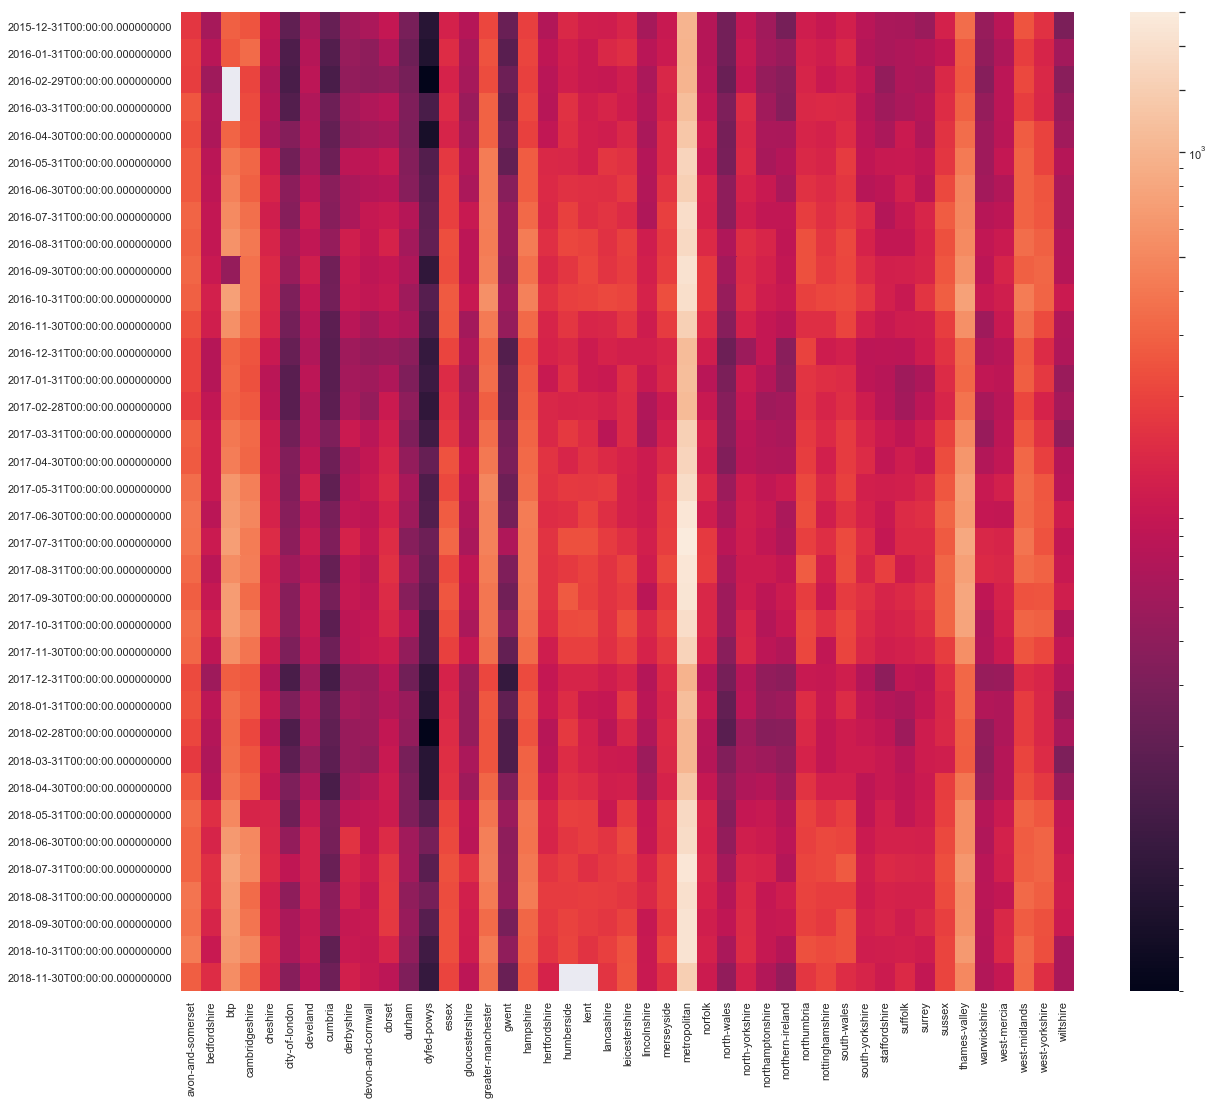

In [10]:
from matplotlib.colors import LogNorm
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(20,18)})
logNorm = LogNorm(vmin=bikeTheftsFrame.min().min(), vmax=bikeTheftsFrame.max().max())

sns.heatmap(bikeTheftsFrame, norm=logNorm)

This shows the the log of bike theft data for each of the forces for each month, the logs allow one better insight into how the data varies.

There are four grey spots for the three forces which show NaN, since I set the default value to NaN so it would be more apparent.

In [11]:
from sklearn.impute import SimpleImputer

fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean')
bikeTheftsFrame_clean = pd.DataFrame(fill_NaN.fit_transform(bikeTheftsFrame))
bikeTheftsFrame_clean.columns = bikeTheftsFrame.columns
bikeTheftsFrame_clean.index = bikeTheftsFrame.index
bikeTheftsFrame_clean = bikeTheftsFrame_clean.astype(int)

bikeTheftsFrame_clean.loc[:,'Total'] = bikeTheftsFrame_clean.sum(axis=1)

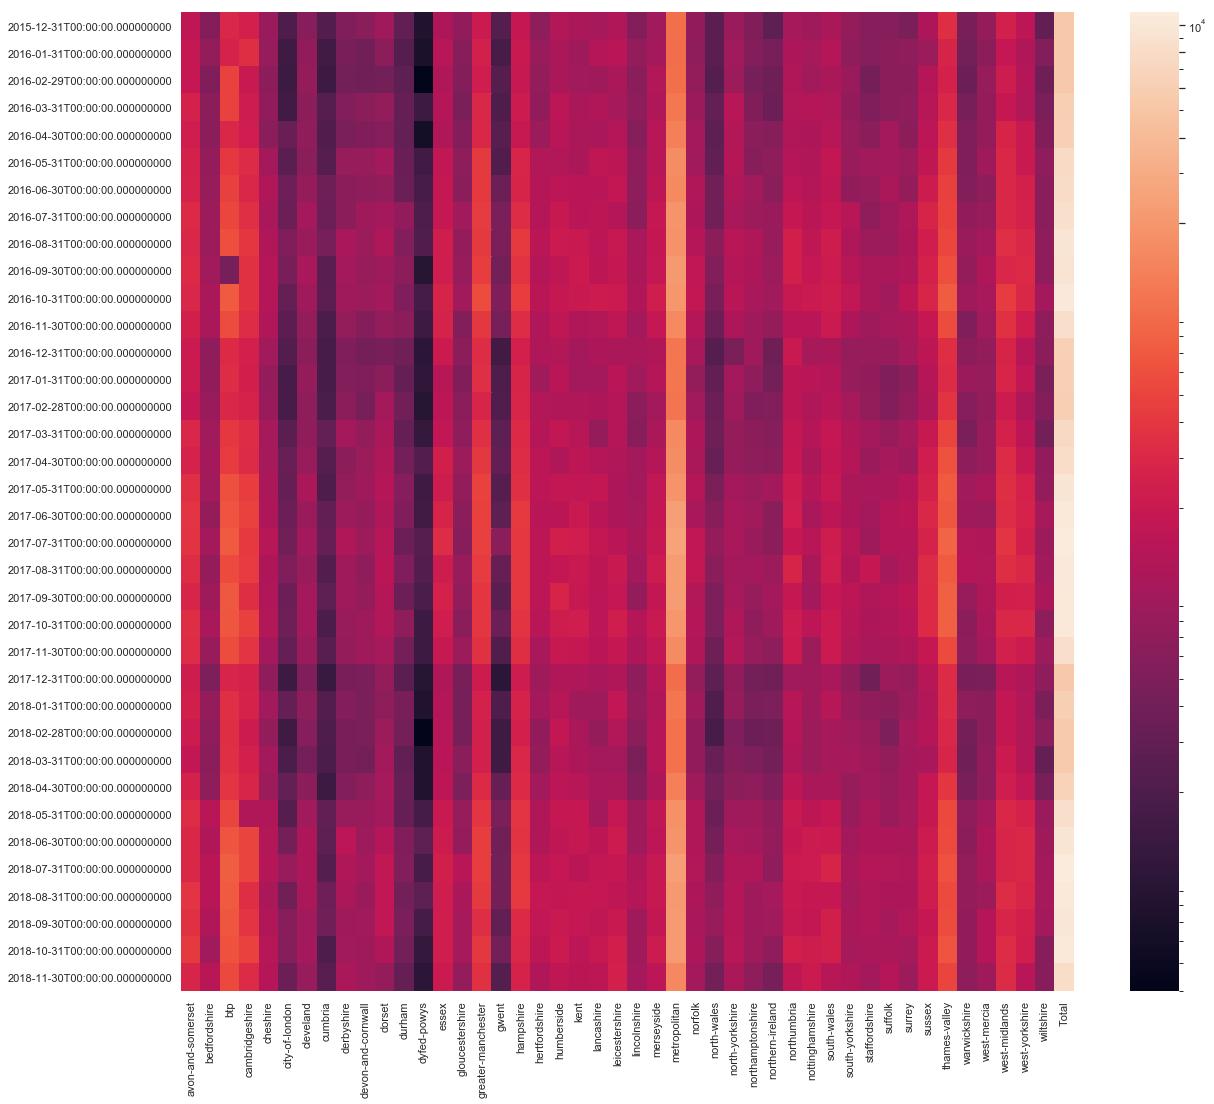

In [13]:

sns.set(rc={'figure.figsize':(20,18)})
logNorm = LogNorm(vmin=bikeTheftsFrame.min().min(), vmax=bikeTheftsFrame.max().max())

sns.heatmap(bikeTheftsFrame_clean, norm=logNorm)

The NaNs have been removed with by using a column average, this is better than zero, and better than removing the three columns, however it is artificial data very roughly inferred from the surrounding dataset, and with no regard to the seasonal context of the missing datapoints.

**Note however that the number of bike thefts appear to dip over winter each year.**

In [14]:
bikeTheftsFrame_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2015-12-31 to 2018-11-30
Freq: M
Data columns (total 46 columns):
avon-and-somerset     36 non-null int64
bedfordshire          36 non-null int64
btp                   36 non-null int64
cambridgeshire        36 non-null int64
cheshire              36 non-null int64
city-of-london        36 non-null int64
cleveland             36 non-null int64
cumbria               36 non-null int64
derbyshire            36 non-null int64
devon-and-cornwall    36 non-null int64
dorset                36 non-null int64
durham                36 non-null int64
dyfed-powys           36 non-null int64
essex                 36 non-null int64
gloucestershire       36 non-null int64
greater-manchester    36 non-null int64
gwent                 36 non-null int64
hampshire             36 non-null int64
hertfordshire         36 non-null int64
humberside            36 non-null int64
kent                  36 non-null int64
lancashire            36 non-

In [38]:
insuranceFrame = pd.DataFrame(bikeTheftsFrame_clean.Total)

Based on the provided dataset. Generate a month on month simplified bicycle insurance price graph.

Base the prices on the number of bicylce related crimes that happen each month.
Each crime accounts for a £1 increase in the price.

The price is cumulative so, if last month's price is £3, and there are two incidents per month,
the price would go up £2 per as follows: £3, £5, £7

For any month when the number of incidents is half of less than the number of incidents in the previous month,
the price goes down £1


*I am assuming the starting price is the previous month's 'Total'?*
*The price decrease of £1 does seem very small considering the how high the insurance price has risen to*

In [40]:
def CalculateInsurancePrice(df):
    price = df.Total[0]
    df['InsurancePrice'] = 0
    
    for index in range(1, len(df)):
        thisMonth = df.Total[index]
        lastMonth = df.Total[index - 1]

        if thisMonth > lastMonth:
            price += thisMonth
        elif thisMonth <= lastMonth/2:
            price -= 1
        
        df.InsurancePrice[index] = price
        
CalculateInsurancePrice(insuranceFrame)
     

In [41]:
insuranceFrame

,Total,InsurancePrice
2015-12-31,5320,0
2016-01-31,5362,10682
2016-02-29,5306,10682
2016-03-31,6024,16706
2016-04-30,6264,22970
2016-05-31,7643,30613
2016-06-30,7876,38489
2016-07-31,8890,47379
2016-08-31,9565,56944
2016-09-30,9306,56944


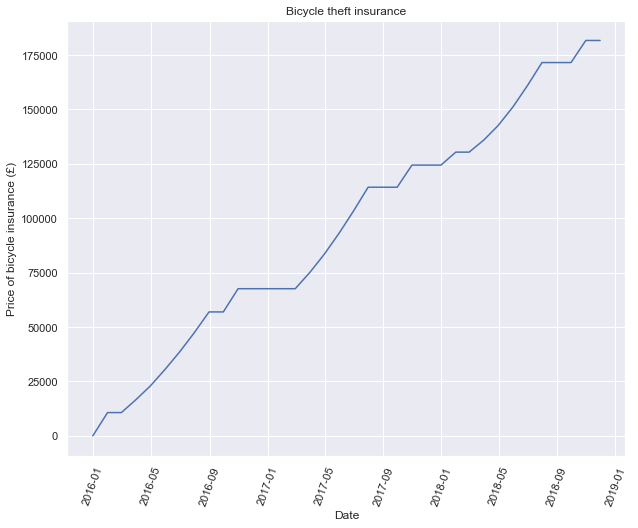

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = (10,8)
plt.plot(insuranceFrame.InsurancePrice)
plt.title('Bicycle theft insurance')
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Price of bicycle insurance (£)')

plt.show()